In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("../DataSets/messy_customer_sales_data.csv")

In [33]:
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


#### Age column is an object column because some rows contain ‘years’ also.

In [35]:
df.describe().round()

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.0,9177.0,1.020000e+04
mean,29090.0,5.0,4.979974e+09
std,208697.0,3.0,2.902593e+09
min,-500.0,1.0,9.208990e+05
25%,12295.0,3.0,2.449157e+09
50%,24330.0,5.0,4.988639e+09
75%,37130.0,8.0,7.510448e+09
max,9999999.0,10.0,9.994402e+09


#### The summary statistics show that Purchase_Amount contains invalid values and outliers, while Feedback_Score follows a valid 1–10 range. Phone_Number is an identifier and should not be treated as a numeric feature.

In [36]:
df.isnull().sum()

Customer_ID           1023
Name                     0
Gender                1026
Age                    951
City                  1016
Signup_Date              0
Last_Purchase_Date    1012
Purchase_Amount       1021
Feedback_Score        1023
Email                    0
Phone_Number             0
Country                732
dtype: int64

##### The dataset contains a significant number of missing values across key columns such as Customer_ID, Gender, Age, City, Last_Purchase_Date, Purchase_Amount, and Feedback_Score.

In [37]:
df.shape

(10200, 12)

#### The dataset contains 10,200 rows and 12 columns.

In [38]:
df.duplicated().sum()

np.int64(15)

#### There are 15 duplicate rows present in the dataset.

In [39]:
df["Customer_ID"].value_counts()

Customer_ID
CUST3344     2
CUST4893     2
CUST7000     2
CUST10824    2
CUST2695     2
            ..
CUST7857     1
CUST3881     1
CUST1565     1
CUST9038     1
CUST5957     1
Name: count, Length: 9000, dtype: int64

In [40]:
df[df["Customer_ID"]=="CUST3344"]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
4483,CUST3344,John Russell,M,65.0,MUMBAI,2023-11-21,2025-08-10,36235.0,8.0,sandra86@example.org,4225788150,India
6218,CUST3344,John Russell,male,65.0,Mumbai,2023-11-21,2025-08-10,36235.0,8.0,sandra86@example.org,4225788150,India


##### The dataset contains duplicate customer records. For example, Customer_ID = CUST3344 appears more than once with the same details, confirming the presence of duplicated rows

In [41]:
for col in df.columns:
    if df[col].nunique()<20:
        print(df[col].value_counts())
        print("-"*20)

Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
--------------------
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
--------------------
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
--------------------
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64
--------------------


##### Categorical columns such as Gender, City, and Country contain inconsistent values due to different letter cases and naming formats (e.g., M, m, MALE; Delhi, DELHI; India, IND,Hyderabad,hyderabad,HYDERABAD).

## Handling Missing Data

In [42]:
df.dropna(subset=["Customer_ID"],inplace=True)

In [43]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                   859
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount       927
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

#### Rows with missing Customer_ID values were removed since the customer identifier is essential.
#### After this step, missing values still remain in other columns and will be handled separately.

In [44]:
df["Age"].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

In [45]:
import re

def extract_age(x):
    age_num=re.findall("[0-9]+",str(x))
    if len(age_num)>0:
        return age_num[0]
    else:
        return x
df["Age"]=df["Age"].apply(extract_age)

In [46]:
df_age=df[df["Age"]!="nan years"]["Age"]

In [47]:
median_age=int(df_age.dropna().astype("int64").median())
median_age

43

In [48]:
df.replace("nan years",median_age,inplace=True)

In [84]:
df["Age"]=df["Age"].fillna(median_age)

In [85]:
df["Age"]=df["Age"].astype("int64")

In [86]:
df["Age"].unique()

array([ 52,  51,  62,  40,  41,  43,  18,  26,  32,  22,  59,  65,  61,
        31,  54,  55,  69,  24,  63,  19,  50,  56,  36,  68,  38,  27,
        57,  23,  25,  66,  28,  30,  46,  48,  20,  37,  67,  35,  58,
        29,  39,  49,  47,  42,  44,  64,  53,  60,  45,  21,  34,  33,
       250,   3,  10])

##### The Age column is mostly clean with realistic values, but contains a few extreme outliers (3, 10, 250) that need correction.

In [52]:
df["Purchase_Amount"].fillna(df["Purchase_Amount"].median(),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\476143817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Purchase_Amount"].fillna(df["Purchase_Amount"].median(),inplace=True)


##### Missing values in the Purchase_Amount column have been filled with the median

In [53]:
df["Feedback_Score"].fillna(df["Feedback_Score"].mode()[0],inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\1893850607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Feedback_Score"].fillna(df["Feedback_Score"].mode()[0],inplace=True)


##### Missing values in the Feedback_Score column have been filled with the mode

In [54]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                     0
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount         0
Feedback_Score          0
Email                   0
Phone_Number            0
Country               664
dtype: int64

##### All missing values in the dataset have been successfully handled, making it complete and ready for analysis.

In [55]:
for col in ["Gender","City","Country"]:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\352567605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


##### Missing values in the categorical columns Gender, City, and Country have been filled with their respective modes

In [56]:
df["Last_Purchase_Date"].ffill(inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\1840665522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Last_Purchase_Date"].ffill(inplace=True)


##### Missing values in the Last_Purchase_Date column have been forward-filled

## Fixing Inconsistent Formating

In [57]:
df["Gender"].unique()

array(['m ', 'M', 'F', 'FEMALE', 'f ', 'male', 'MALE', 'female'],
      dtype=object)

In [58]:
df["Gender"] = df["Gender"].str.lower().str.strip()

In [59]:
df["Gender"].replace({"m":"male","f":"female"},inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\3662000997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"m":"male","f":"female"},inplace=True)


In [60]:
df["Gender"].unique()

array(['male', 'female'], dtype=object)

##### The Gender column previously had multiple inconsistent values like female, f, male, m, FEMALE, MALE, etc., which have now been standardized to just "male" and "female"

In [61]:
df["City"].unique()

array([' KOLKATA ', ' Kolkata ', ' hyderabad ', ' CHENNAI ', ' kolkata ',
       ' BANGALORE ', ' Hyderabad ', ' HYDERABAD ', ' Mumbai ',
       ' chennai ', ' Delhi ', ' bangalore ', ' Bangalore ', ' delhi ',
       ' Chennai ', ' MUMBAI ', ' DELHI ', ' mumbai '], dtype=object)

In [62]:
df["City"]=df["City"].str.strip().str.lower()

In [63]:
df["City"].unique()

array(['kolkata', 'hyderabad', 'chennai', 'bangalore', 'mumbai', 'delhi'],
      dtype=object)

##### The City column was cleaned by removing extra spaces and standardizing text to lowercase, resulting in six consistent city categories and improved data quality.

In [64]:
df["Country"].unique()

array(['India', 'india', 'InDia', 'IND'], dtype=object)

In [65]:
df["Country"]=df["Country"].str.lower()

In [66]:
df["Country"].replace({"ind":"india"},inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\3094057691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country"].replace({"ind":"india"},inplace=True)


In [67]:
df["Country"].unique()

array(['india'], dtype=object)

##### The Country column was standardized by converting all values to lowercase and mapping variations like "IND" and "InDia" to "india"

In [68]:
df[df.duplicated()].shape

(163, 12)

##### The dataset initially contained 163 duplicate rows, indicating repeated records that needed to be removed to ensure data accuracy and reliability.

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df["Customer_ID"].value_counts()

Customer_ID
CUST3693    2
CUST6833    2
CUST5341    2
CUST1002    2
CUST9950    2
           ..
CUST7857    1
CUST3881    1
CUST1565    1
CUST9038    1
CUST5957    1
Name: count, Length: 9000, dtype: int64

In [71]:
 df[df["Customer_ID"]=="CUST3693"]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
3967,CUST3693,Chad Dominguez,female,3,chennai,2022-01-20,2025-02-20,24268.0,7.0,donnaacosta@example.net,7342776270,india
4953,CUST3693,Chad Dominguez,female,54,chennai,2022-01-20,2025-02-20,24268.0,7.0,donnaacosta@example.net,7342776270,india


In [72]:
df.drop_duplicates(subset=["Customer_ID"],keep="first",inplace=True)

##### Duplicate Customer_ID values were identified (e.g., CUST3693 appearing with conflicting details), and duplicates were resolved by keeping the first occurrence per customer to ensure one unique record per customer.

In [73]:
df.shape

(9000, 12)

##### After removing duplicates and cleaning the data, the dataset now contains 9,000 rows and 12 columns, representing unique customer records 

In [74]:
df["Signup_Date"]=pd.to_datetime(df["Signup_Date"])

In [75]:
df["Last_Purchase_Date"]=pd.to_datetime(df["Last_Purchase_Date"])

###### The Signup_Date and Last_purchase_date column was converted to datetime format to enable accurate time-based analysis

In [76]:
df.dtypes

Customer_ID                   object
Name                          object
Gender                        object
Age                            int64
City                          object
Signup_Date           datetime64[ns]
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score               float64
Email                         object
Phone_Number                   int64
Country                       object
dtype: object

###### All columns now have appropriate data types, with dates converted to datetime and numerical fields correctly formatted

## Handling Outliers

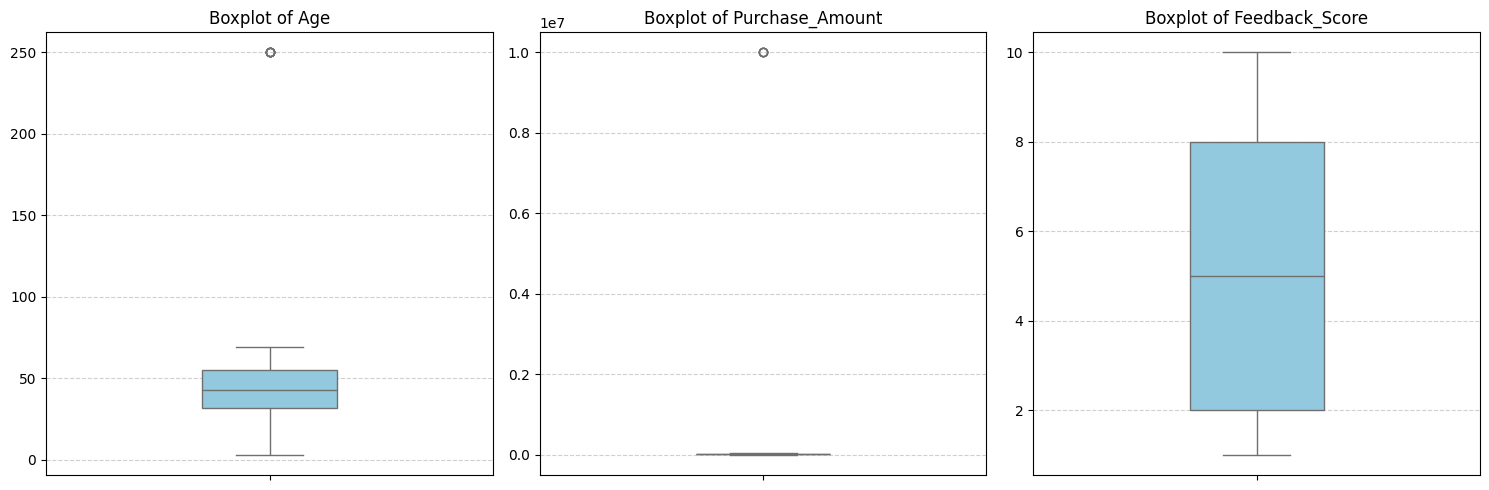

In [77]:
import seaborn as sns
cols=["Age","Purchase_Amount","Feedback_Score"]
plt.figure(figsize=(15,5))
for i,col in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col],color="Skyblue",width=0.3)
    plt.title(f"Boxplot of {col}",fontsize=12)
    plt.ylabel("")
    plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

###### Boxplots were used to visually identify outliers in Age, Purchase_Amount, and Feedback_Score, helping detect extreme and invalid values before outlier treatment.

In [78]:
from scipy import stats
import numpy as np

In [79]:
z_score=np.abs(stats.zscore(df[["Age","Purchase_Amount"]]))

In [80]:
df_clean=df[~(z_score>3).any(axis=1)]

In [81]:
df_clean.shape

(8989, 12)

In [82]:
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,male,52,kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,india
1,CUST5957,Jason Thomas,male,51,kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,female,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,india
3,CUST2934,Brenda Pierce,female,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,female,41,chennai,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,india
...,...,...,...,...,...,...,...,...,...,...,...,...
10193,CUST6352,Isaiah Terry,female,26,kolkata,2023-03-04,2025-06-30,43655.0,6.0,lopezleonard@example.net,7694723210,india
10194,CUST6146,Cody Thompson,female,40,kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,india
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,india
10197,CUST6315,Joshua Martinez,male,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,india


In [87]:
df_clean = df_clean[(df_clean["Age"] >= 18) & (df_clean["Age"] <= 90)]

#### Outliers in Age and Purchase_Amount were removed using the Z-score method (|z| > 3), resulting in a cleaner dataset with 8,989 rows suitable for reliable analysis and modeling.

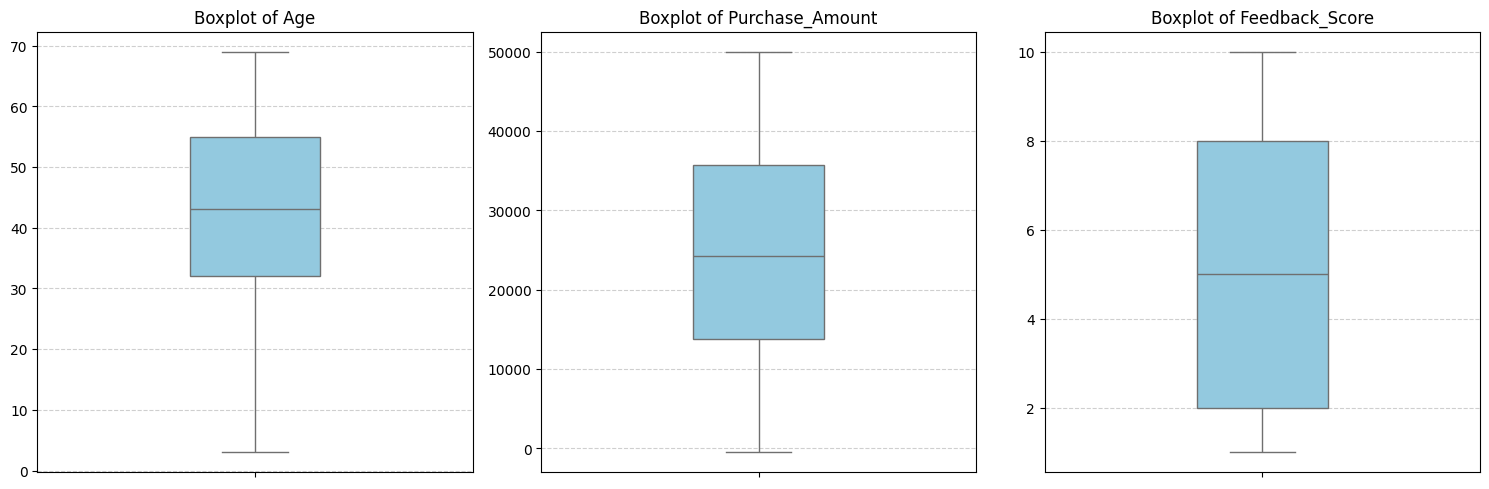

In [83]:
import seaborn as sns
cols=["Age","Purchase_Amount","Feedback_Score"]
plt.figure(figsize=(15,5))
for i,col in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df_clean[col],color="Skyblue",width=0.3)
    plt.title(f"Boxplot of {col}",fontsize=12)
    plt.ylabel("")
    plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

###### Boxplots of the cleaned data confirm that extreme outliers in Age, Purchase_Amount, and Feedback_Score have been successfully reduced

In [88]:
df_model = df_clean.drop(columns=["Customer_ID", "Name", "Email", "Phone_Number"])

#### After comprehensive data cleaning and preprocessing, the dataset was reduced from 10,200 to 8,989 records. All missing values were handled, categorical variables were standardized, duplicates were removed, incorrect data types were fixed, and extreme outliers were eliminated. The final dataset is clean, consistent, and suitable for further analysis and machine learning modeling.